In [1]:
import tensorflow as tf


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
X=pd.read_csv('../train_x.csv')
Y=pd.read_csv('../train_y.csv')
Y=Y['target']
#X.drop(['Unnamed: 0'],axis=1,inplace=True)
Y=Y.to_numpy()
X=X.to_numpy()

In [4]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.15, random_state=42)

In [5]:
from tensorflow import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(166),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
    ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [6]:
pos=Y[Y==1].size
neg=Y[Y==0].size
initial_bias = np.log([pos/neg])



In [9]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model_bias = make_model(output_bias=initial_bias)
model_bias.summary()
careful_bias_history=model_bias.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(x_test, y_test), 
    verbose=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               21376     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 54,529
Trainable params: 54,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] -

8/8 [==============================] - 0s 13ms/step - loss: 0.3491 - tp: 11.0000 - fp: 7.0000 - tn: 13550.0000 - fn: 2037.0000 - accuracy: 0.8690 - precision: 0.6111 - recall: 0.0054 - auc: 0.7298 - prc: 0.2969 - val_loss: 0.3927 - val_tp: 0.0000e+00 - val_fp: 6.0000 - val_tn: 2371.0000 - val_fn: 377.0000 - val_accuracy: 0.8609 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6353 - val_prc: 0.2152
Epoch 18/100
8/8 [==============================] - 0s 13ms/step - loss: 0.3486 - tp: 15.0000 - fp: 9.0000 - tn: 13548.0000 - fn: 2033.0000 - accuracy: 0.8691 - precision: 0.6250 - recall: 0.0073 - auc: 0.7301 - prc: 0.3017 - val_loss: 0.3933 - val_tp: 0.0000e+00 - val_fp: 7.0000 - val_tn: 2370.0000 - val_fn: 377.0000 - val_accuracy: 0.8606 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6352 - val_prc: 0.2138
Epoch 19/100
8/8 [==============================] - 0s 12ms/step - loss: 0.3477 - tp: 16.0000 - fp: 10.0000 - tn: 13547.0000 - fn: 2032.0000 - accura

In [10]:
model_zero_bias = make_model()
model_zero_bias.summary()
zero_bias_history=model_zero_bias.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(x_test, y_test), 
    verbose=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               21376     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 54,529
Trainable params: 54,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] -

8/8 [==============================] - 0s 13ms/step - loss: 0.3483 - tp: 12.0000 - fp: 9.0000 - tn: 13548.0000 - fn: 2036.0000 - accuracy: 0.8690 - precision: 0.5714 - recall: 0.0059 - auc: 0.7303 - prc: 0.3030 - val_loss: 0.3914 - val_tp: 2.0000 - val_fp: 7.0000 - val_tn: 2370.0000 - val_fn: 375.0000 - val_accuracy: 0.8613 - val_precision: 0.2222 - val_recall: 0.0053 - val_auc: 0.6405 - val_prc: 0.2226
Epoch 18/100
8/8 [==============================] - 0s 13ms/step - loss: 0.3478 - tp: 17.0000 - fp: 10.0000 - tn: 13547.0000 - fn: 2031.0000 - accuracy: 0.8692 - precision: 0.6296 - recall: 0.0083 - auc: 0.7323 - prc: 0.3030 - val_loss: 0.3925 - val_tp: 2.0000 - val_fp: 5.0000 - val_tn: 2372.0000 - val_fn: 375.0000 - val_accuracy: 0.8620 - val_precision: 0.2857 - val_recall: 0.0053 - val_auc: 0.6411 - val_prc: 0.2237
Epoch 19/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3459 - tp: 19.0000 - fp: 9.0000 - tn: 13548.0000 - fn: 2029.0000 - accuracy: 0.8694 - precision: 0

Epoch 1/100
8/8 [==============================] - 2s 104ms/step - loss: 0.4711 - tp: 24.0000 - fp: 160.0000 - tn: 15774.0000 - fn: 2401.0000 - accuracy: 0.8605 - precision: 0.1304 - recall: 0.0099 - auc: 0.5272 - prc: 0.1403 - val_loss: 0.4593 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 2377.0000 - val_fn: 377.0000 - val_accuracy: 0.8631 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5155 - val_prc: 0.1591
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.4194 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 13557.0000 - fn: 2048.0000 - accuracy: 0.8688 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5711 - prc: 0.1836 - val_loss: 0.4203 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 2377.0000 - val_fn: 377.0000 - val_accuracy: 0.8631 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5633 - val_prc: 0.1939
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.3951 - tp: 0.0000e+00 - fp: 0.0000e+00

8/8 [==============================] - 0s 15ms/step - loss: 0.3412 - tp: 42.0000 - fp: 19.0000 - tn: 13538.0000 - fn: 2006.0000 - accuracy: 0.8702 - precision: 0.6885 - recall: 0.0205 - auc: 0.7494 - prc: 0.3321 - val_loss: 0.3974 - val_tp: 1.0000 - val_fp: 9.0000 - val_tn: 2368.0000 - val_fn: 376.0000 - val_accuracy: 0.8602 - val_precision: 0.1000 - val_recall: 0.0027 - val_auc: 0.6342 - val_prc: 0.2182
Epoch 21/100
8/8 [==============================] - 0s 15ms/step - loss: 0.3411 - tp: 26.0000 - fp: 12.0000 - tn: 13545.0000 - fn: 2022.0000 - accuracy: 0.8697 - precision: 0.6842 - recall: 0.0127 - auc: 0.7491 - prc: 0.3316 - val_loss: 0.3986 - val_tp: 7.0000 - val_fp: 18.0000 - val_tn: 2359.0000 - val_fn: 370.0000 - val_accuracy: 0.8591 - val_precision: 0.2800 - val_recall: 0.0186 - val_auc: 0.6327 - val_prc: 0.2156
Epoch 22/100
8/8 [==============================] - 0s 13ms/step - loss: 0.3380 - tp: 39.0000 - fp: 19.0000 - tn: 13538.0000 - fn: 2009.0000 - accuracy: 0.8700 - precisio

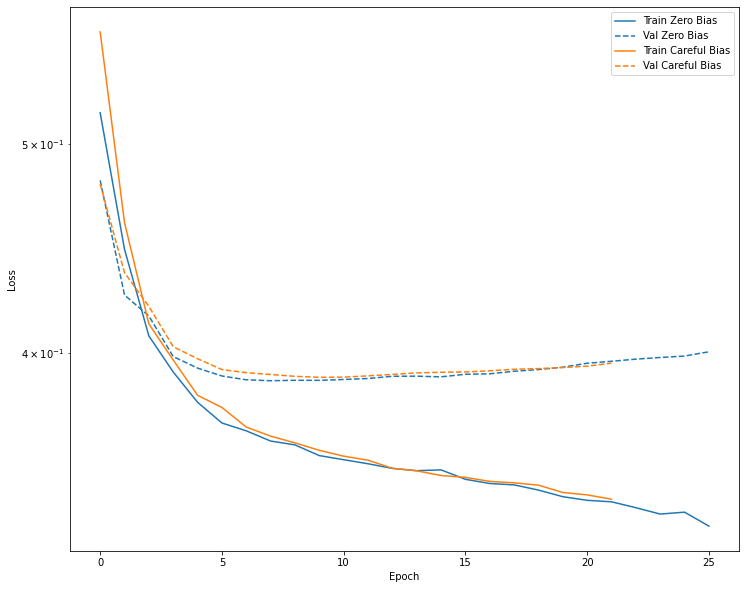

In [14]:
import matplotlib.pyplot as plt    
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  

plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

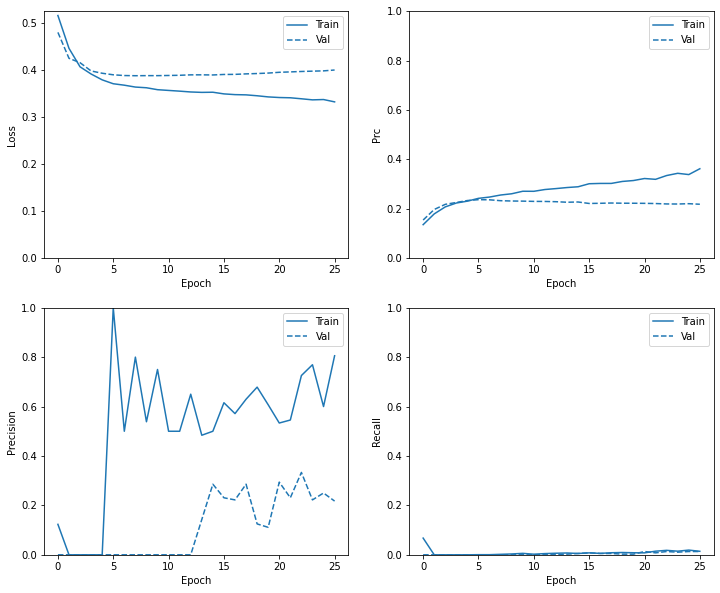

In [15]:

def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
    
plot_metrics(zero_bias_history)

loss :  0.3912261724472046
tp :  3.0
fp :  10.0
tn :  2367.0
fn :  374.0
accuracy :  0.8605664372444153
precision :  0.23076923191547394
recall :  0.007957560010254383
auc :  0.6415855884552002
prc :  0.22185300290584564

Legitimate Transactions Detected (True Negatives):  1842
Legitimate Transactions Incorrectly Detected (False Positives):  535
Fraudulent Transactions Missed (False Negatives):  212
Fraudulent Transactions Detected (True Positives):  165
Total Fraudulent Transactions:  377


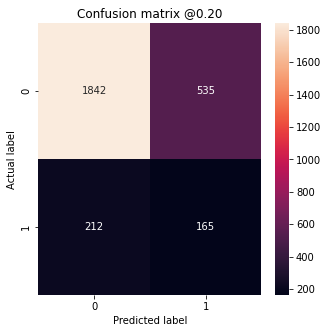

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

baseline_results = model_zero_bias.evaluate(x_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_zero_bias.metrics_names, baseline_results):
  print(name, ': ', value)
print()
test_predictions_baseline = model_zero_bias.predict(x_test, batch_size=BATCH_SIZE)
plot_cm(y_test, test_predictions_baseline,p=0.2)

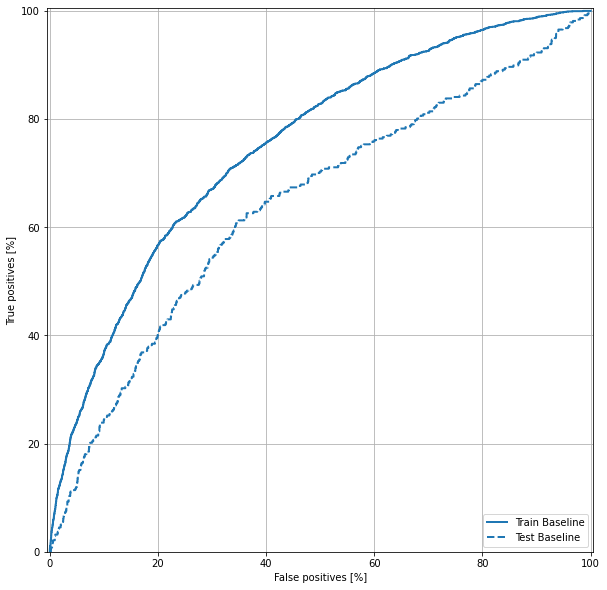

In [29]:
import sklearn
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([0,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

train_predictions_baseline = model_zero_bias.predict(x_train, batch_size=BATCH_SIZE)
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

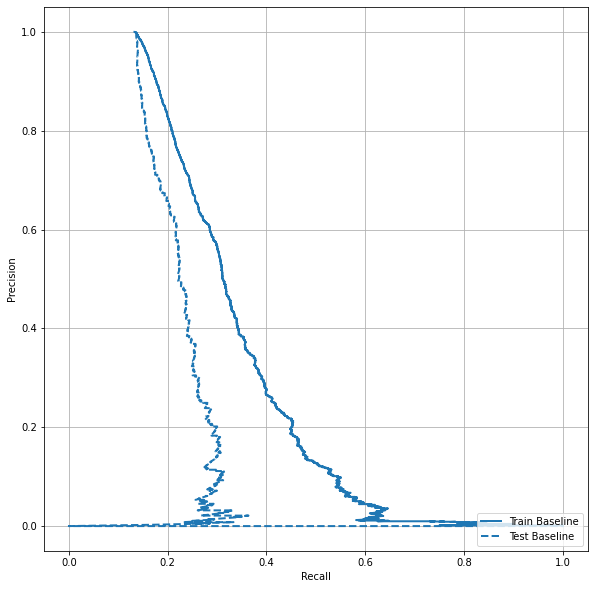

In [32]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_prc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [98]:
X_val=pd.read_csv('../test_x.csv')

In [99]:
y_prob_pos_test=model.predict(X_val)


In [100]:
y_val=pd.read_csv('../test_y.csv')
y_val['target']=y_prob_pos_test
y_val.to_csv('dnn.csv',index=False)